In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib import rcParams

filename_input = 'merged_behawior_scl_Part1_ImputedConditionMean18s.csv'
preamble = 'Part1 18s'


result = pd.read_csv(filename_input)
result.head()
group1 = result['Condition_x']=='Reskrypcja'
group2 = result['Condition_x']=='Reskrypcja10'
group3 = result['Condition_x']=='Ekspozycja'
group4 = result['Condition_x']=='CFT'
group_12 = group1 | group2 | group3 | group4


<Figure size 1440x2160 with 0 Axes>

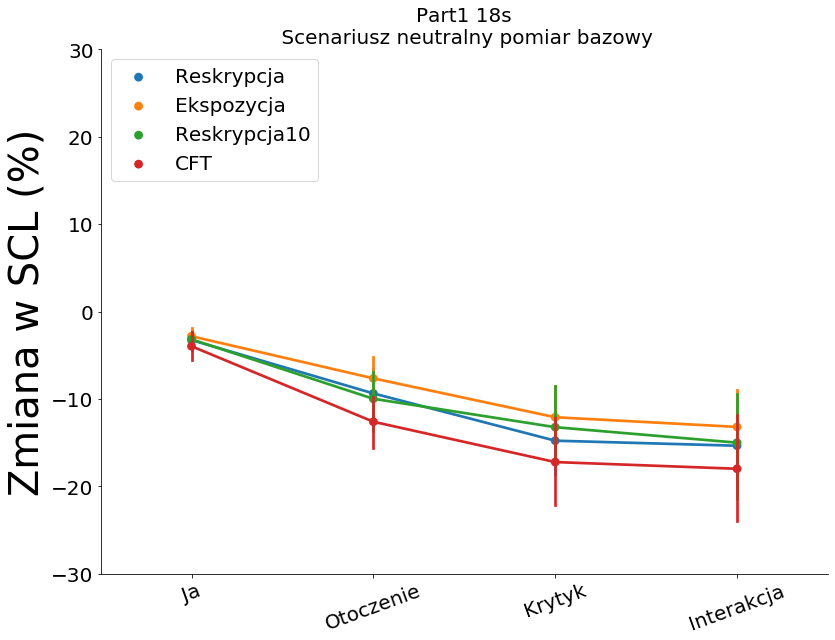

<Figure size 1440x2160 with 0 Axes>

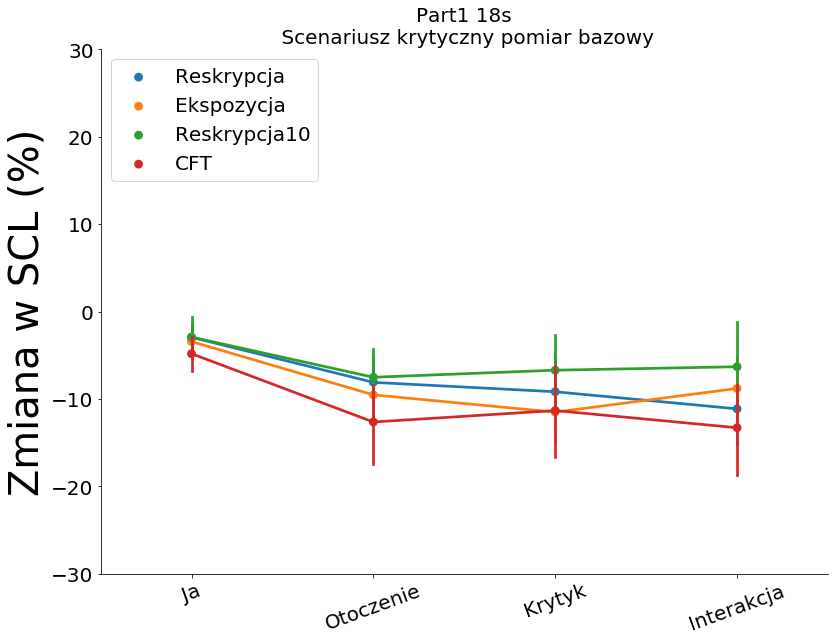

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

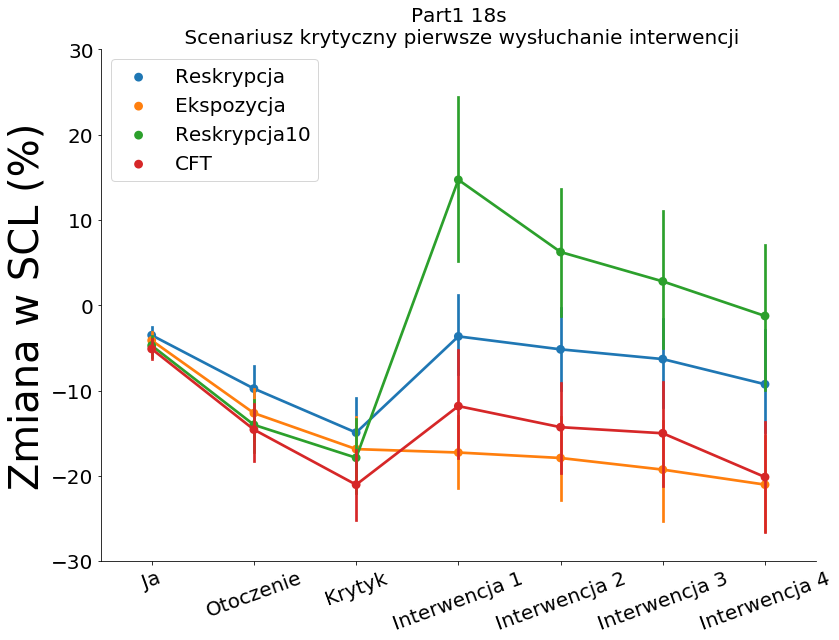

<Figure size 1440x2160 with 0 Axes>

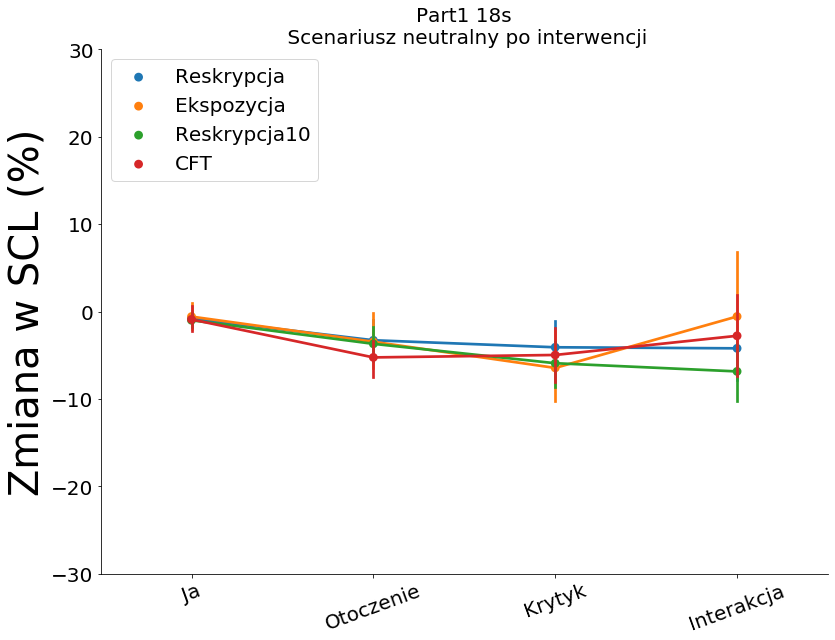

<Figure size 1440x2160 with 0 Axes>

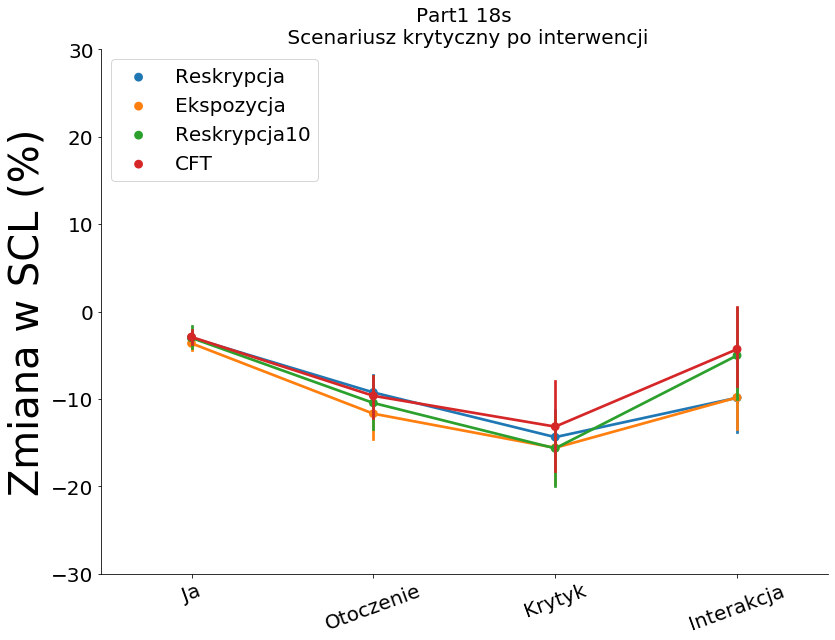

<Figure size 1440x2160 with 0 Axes>

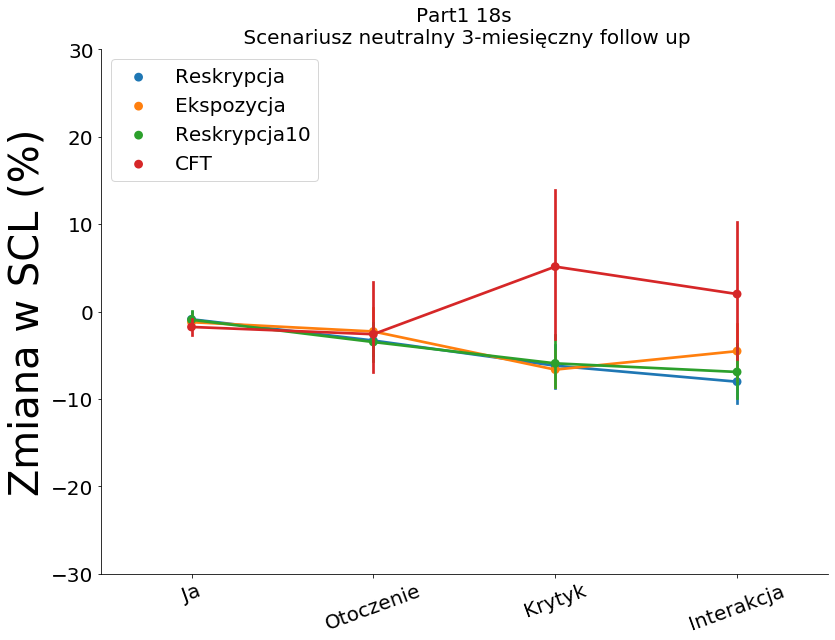

<Figure size 1440x2160 with 0 Axes>

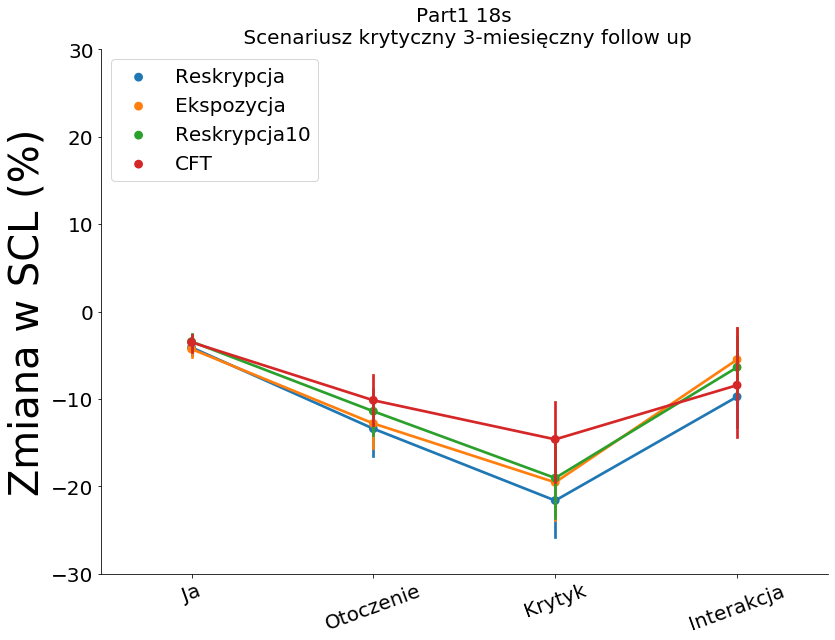

<Figure size 1440x2160 with 0 Axes>

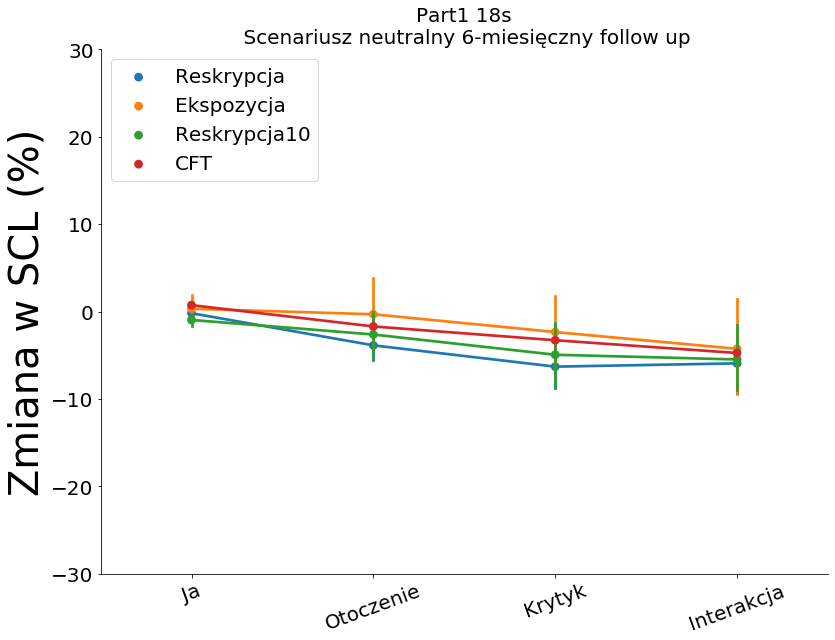

<Figure size 1440x2160 with 0 Axes>

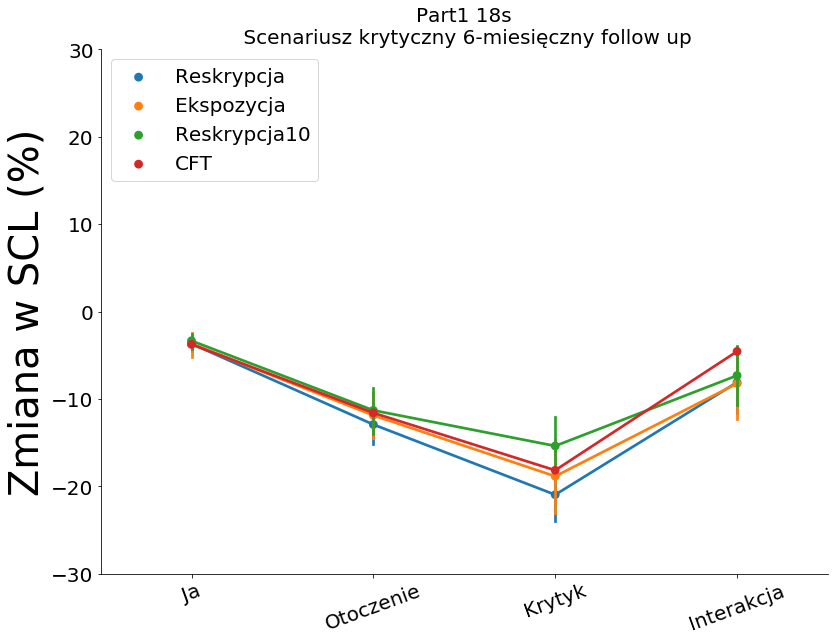

In [2]:
time_point = {'TP1':'pomiar bazowy',
              'TP2':'pierwsze wysłuchanie interwencji',
              'TP63':'po interwencji',
             'TP73':'3-miesięczny follow up',
             'TP83':'6-miesięczny follow up'}
scenario = {'Neut':'Scenariusz neutralny','CritT':'Scenariusz krytyczny'}

colset_dict = {'TP1':['Ja','Otoczenie','Krytyk','Interakcja'],
              'TP2':['Ja','Otoczenie','Krytyk','Interwencja 1', 'Interwencja 2','Interwencja 3','Interwencja 4'],
              'TP63':['Ja','Otoczenie','Krytyk','Interakcja'],
              'TP73':['Ja','Otoczenie','Krytyk','Interakcja'],
              'TP83':['Ja','Otoczenie','Krytyk','Interakcja']}

tp = 'TP73'
cond = 'Neut'

for tpoint in list(time_point.keys()):
    for scen in list(scenario.keys()):
        try:
            tp = tpoint
            tp_formal = time_point[tp]
            scen_formal = scenario[scen]
            cond = scen
            group = group_12
            title = f'{preamble}\n {scen_formal} {tp_formal}'
            ylab = 'Zmiana w SCL (%)'

            plt.figure(figsize=(20,30))

            tmp = result.loc[group,result.columns.str.contains(fr'SCL_{tp}_{cond}_P.*')]
            tmp.columns = colset_dict[tpoint]
            tmp['Condition'] = result['Condition_x']
            tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
            sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='sd'
                        ,height=9, aspect=1.3,legend=False)


            plt.xlabel('',fontsize=40)
            plt.ylabel(ylab,fontsize=40)
            plt.xticks(fontsize=20,rotation=20)
            plt.yticks(fontsize=20)
            plt.title(title,fontsize=20)

            plt.ylim([-30,30])
            plt.legend(loc='upper left',fontsize=20)

            plt.tight_layout()
            plt.savefig(f'{preamble} {scen_formal} {tp_formal}.png')
        except:
            pass

<Figure size 1440x2160 with 0 Axes>

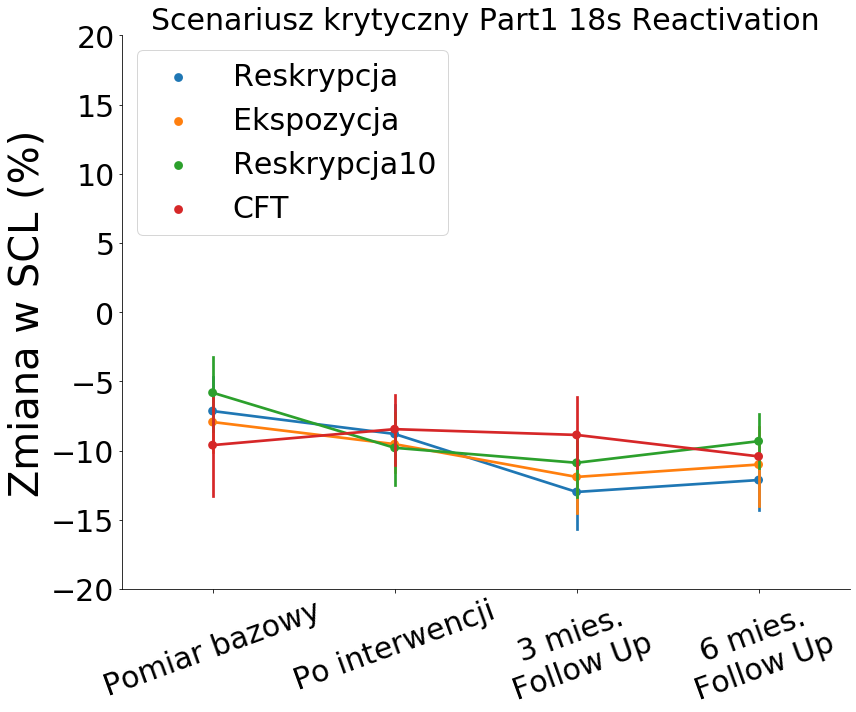

In [3]:

cond = 'CritT'
group = group_12
title = f'{scen_formal} {tp_formal}'
ylab = 'Zmiana w SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pomiar bazowy','Po interwencji','3 mies.\nFollow Up','6 mies.\nFollow Up']
# colnames = ['Pomiar bazowy','3 mies.\nFollow Up']
# colnames = ['Pomiar bazowy','Po interwencji']
part_suspence='suspence'
title = f'Scenariusz krytyczny {preamble} Reactivation'

plt.figure(figsize=(20,30))

tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
# tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspeaance}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

# tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
tmp.columns = colnames
tmp['Condition'] = result['Condition_x']
tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='ci',height=10, aspect=1.2,legend=False)


plt.xlabel('',fontsize=40)
plt.ylabel(ylab,fontsize=40)
plt.xticks(fontsize=30,rotation=20)
plt.yticks(fontsize=30)
plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.tight_layout()
plt.savefig(f'{title}.png')

<Figure size 1440x2160 with 0 Axes>

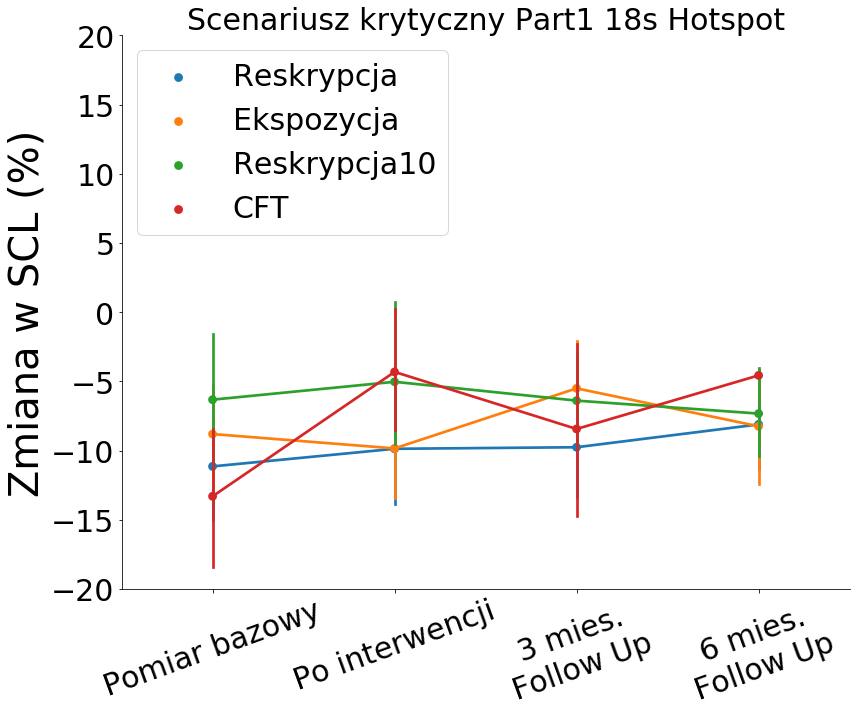

In [4]:

cond = 'CritT'
group = group_12
title = f'{scen_formal} {tp_formal}'
ylab = 'Zmiana w SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pomiar bazowy','Po interwencji','3 mies.\nFollow Up','6 mies.\nFollow Up']
# colnames = ['Pomiar bazowy','3 mies.\nFollow Up']
# colnames = ['Pomiar bazowy','Po interwencji']
part_suspence='P4'
title = f'Scenariusz krytyczny {preamble} Hotspot'

plt.figure(figsize=(20,30))

tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
# tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspeaance}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

# tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
tmp.columns = colnames
tmp['Condition'] = result['Condition_x']
tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='ci',height=10, aspect=1.2,legend=False)


plt.xlabel('',fontsize=40)
plt.ylabel(ylab,fontsize=40)
plt.xticks(fontsize=30,rotation=20)
plt.yticks(fontsize=30)
plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.tight_layout()
plt.savefig(f'{title}.png')